In [ ]:
 !pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
!pip install opencv-python

In [ ]:
!pip install jupyter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.2 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import ast
import torch
import PIL
from tqdm.auto import tqdm
import shutil as sh
from pathlib import Path
import random

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.30GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [ ]:
!nvidia-smi
!nvcc --version

Tue Apr 16 08:29:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install albumentations==1.0.3
display.clear_output()
!pip show albumentations

Name: albumentations
Version: 1.0.3
Summary: Fast image augmentation library and easy to use wrapper around other libraries
Home-page: https://github.com/albumentations-team/albumentations
Author: Buslaev Alexander, Alexander Parinov, Vladimir Iglovikov, Eugene Khvedchenya, Druzhinin Mikhail
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, opencv-python-headless, PyYAML, scikit-image, scipy
Required-by: 


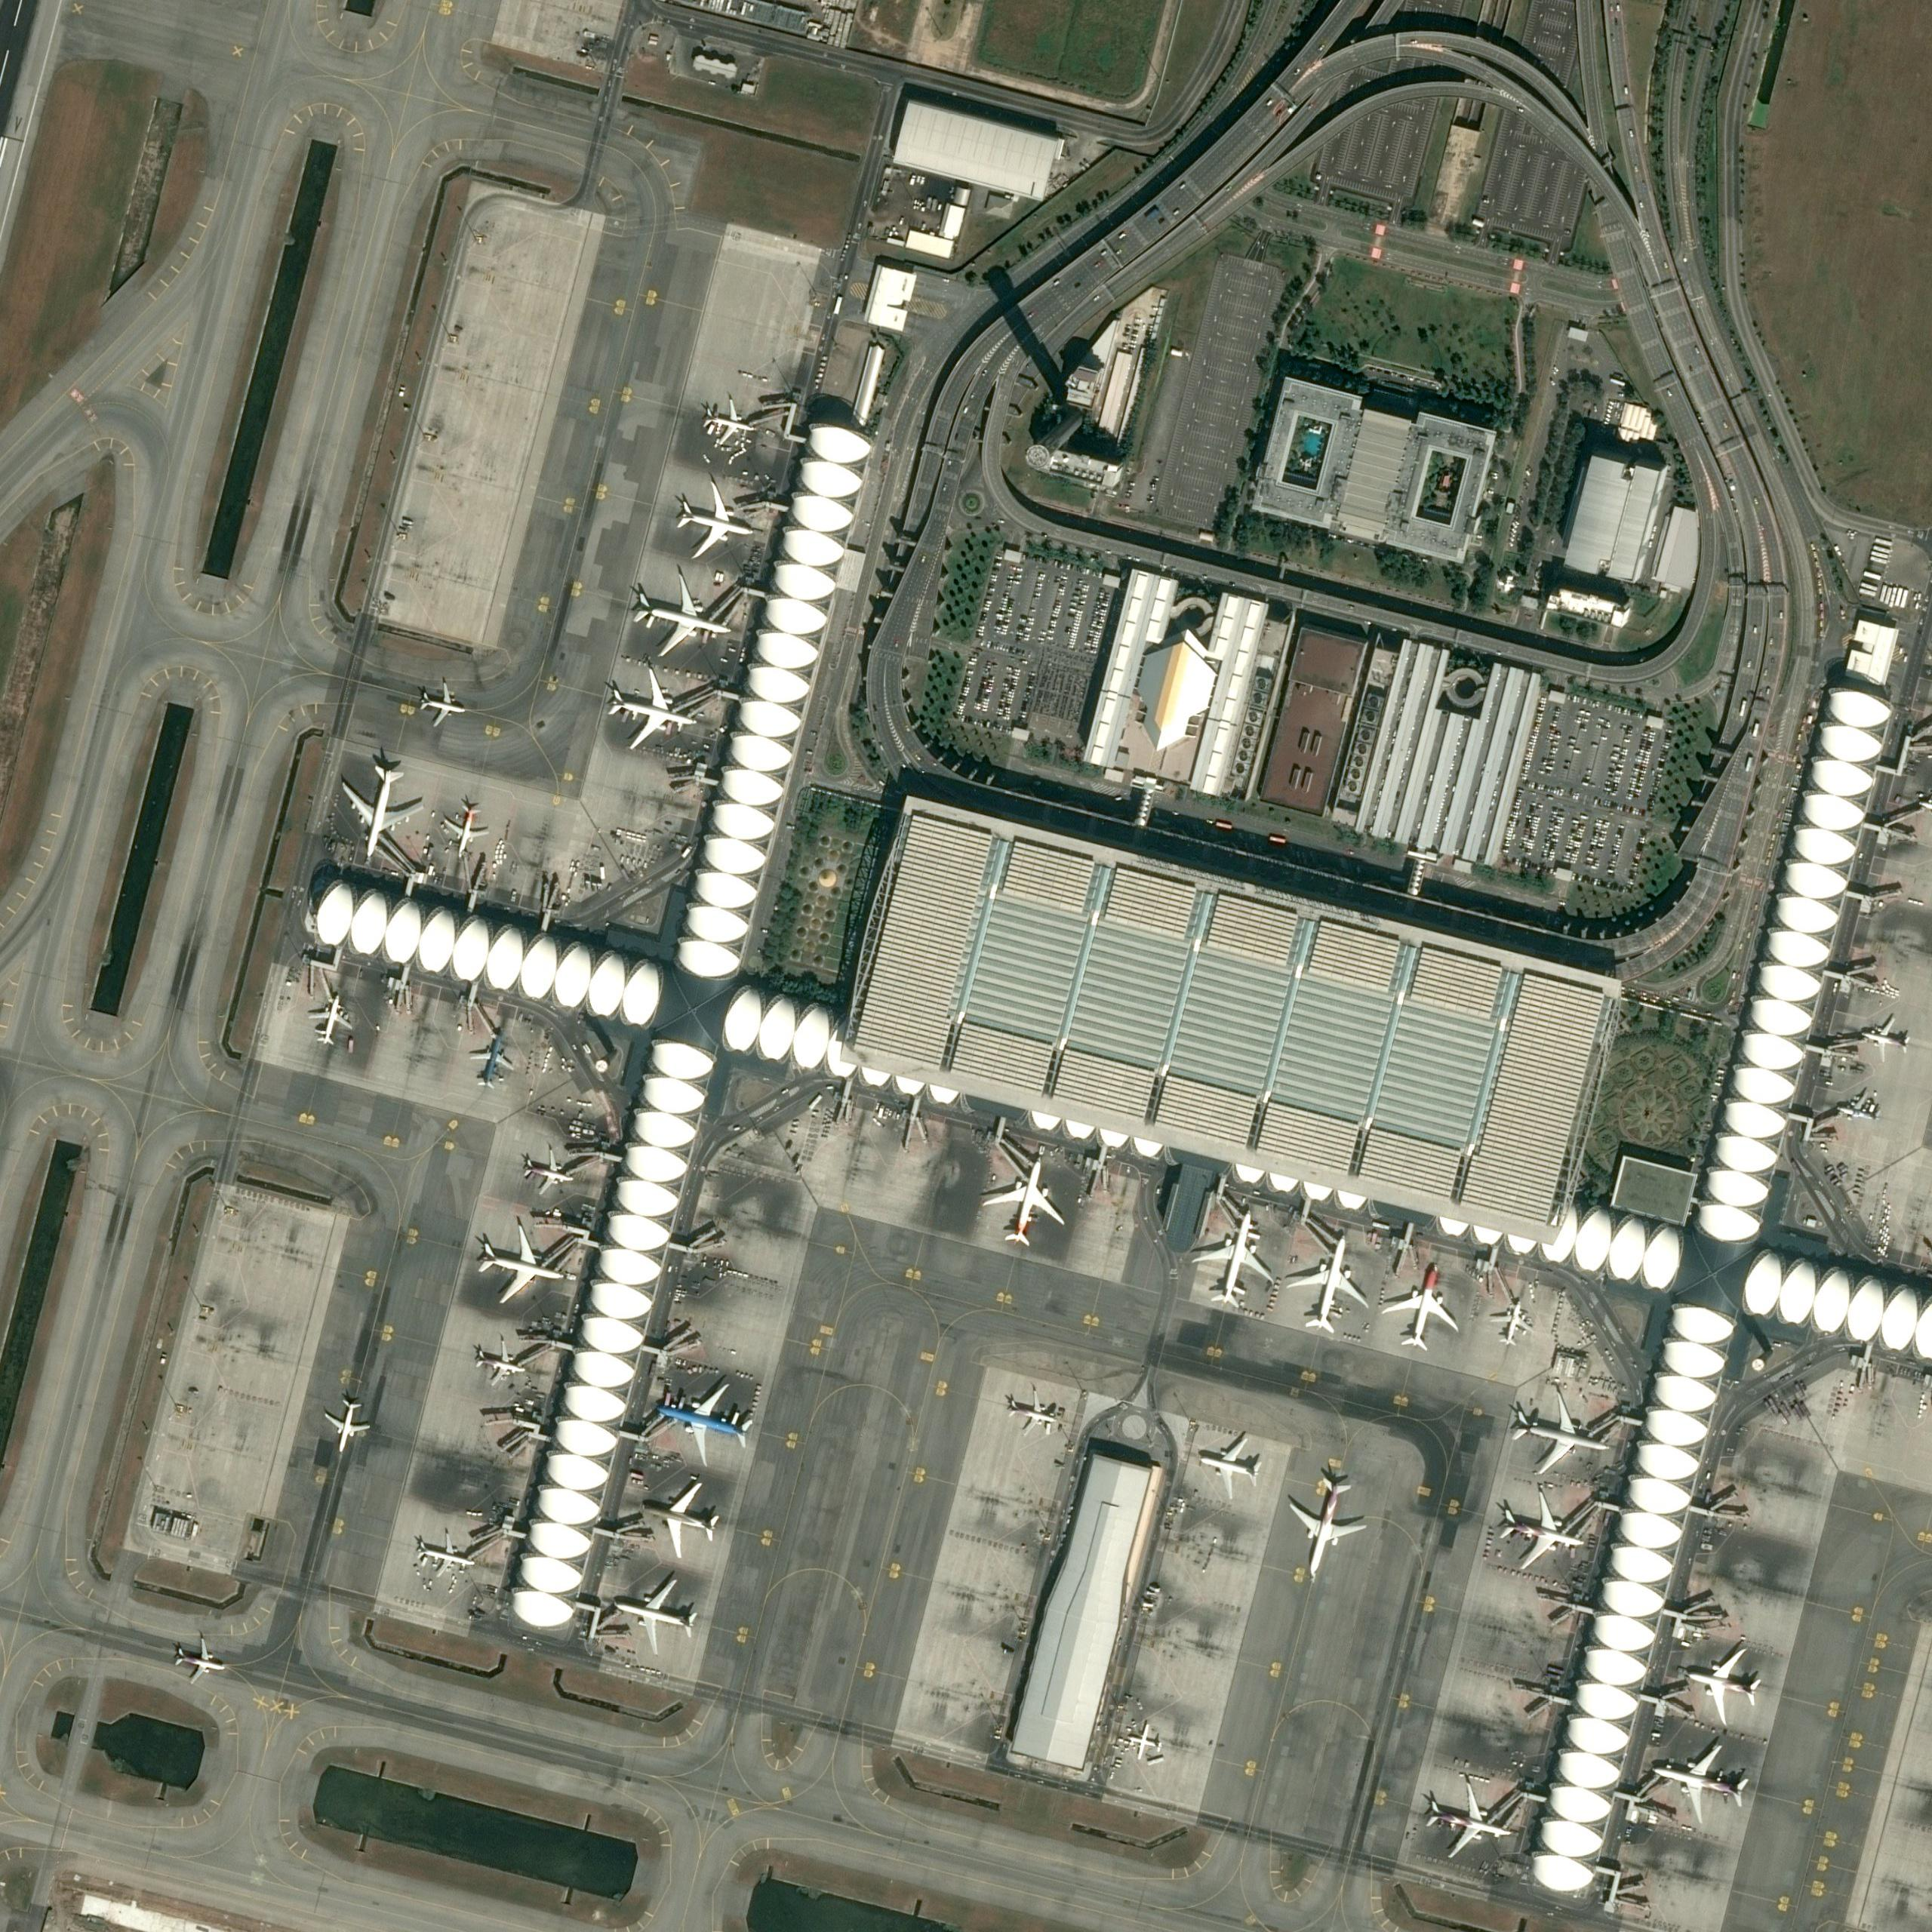

In [ ]:
DATA_DIR = Path('/content/drive/MyDrive/airbus')
img_list = list(DATA_DIR.glob('images/*.jpg'))
pickone = random.choice(img_list)
display.Image(pickone)

In [ ]:
print(f"Found {len(img_list)} images files in {DATA_DIR}")

img = PIL.Image.open(pickone)
IMAGE_HEIGHT, IMAGE_WIDTH = img.size
num_channels = len(img.mode)
print("Image size: {}".format((IMAGE_HEIGHT, IMAGE_WIDTH)))
print("Num channels: {}".format(num_channels))

Found 103 images files in /content/drive/MyDrive/airbus
Image size: (2560, 2560)
Num channels: 3


In [ ]:
df = pd.read_csv(DATA_DIR / 'annotations.csv')
# convert a string record into a valid python object
def f(x):
    return ast.literal_eval(x.rstrip('\r\n'))

df = pd.read_csv(DATA_DIR / "annotations.csv",
                converters={'geometry': f})
df.head(10)
df.describe()

,id
count,3425.000000
mean,1713.000000
std,988.856663
min,1.000000
25%,857.000000
50%,1713.000000
75%,2569.000000
max,3425.000000


In [ ]:
def getBounds(geometry):
    try:
        arr = np.array(geometry).T
        xmin = np.min(arr[0])
        ymin = np.min(arr[1])
        xmax = np.max(arr[0])
        ymax = np.max(arr[1])
        return (xmin, ymin, xmax, ymax)
    except:
        return np.nan

def getWidth(bounds):
    try:
        (xmin, ymin, xmax, ymax) = bounds
        return np.abs(xmax - xmin)
    except:
        return np.nan

def getHeight(bounds):
    try:
        (xmin, ymin, xmax, ymax) = bounds
        return np.abs(ymax - ymin)
    except:
        return np.nan

# Create bounds, width and height
df.loc[:,'bounds'] = df.loc[:,'geometry'].apply(getBounds)
df.loc[:,'width'] = df.loc[:,'bounds'].apply(getWidth)
df.loc[:,'height'] = df.loc[:,'bounds'].apply(getHeight)
df.tail(10)

,id,image_id,geometry,class,bounds,width,height
3415,3416,48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg,"[(1888, 1586), (1953, 1586), (1953, 1646), (18...",Airplane,"(1888, 1586, 1953, 1646)",65,60
3416,3417,48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg,"[(1809, 1790), (1869, 1790), (1869, 1848), (18...",Airplane,"(1809, 1790, 1869, 1848)",60,58
3417,3418,48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg,"[(1760, 1878), (1828, 1878), (1828, 1936), (17...",Airplane,"(1760, 1878, 1828, 1936)",68,58
3418,3419,48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg,"[(1736, 1946), (1794, 1946), (1794, 2000), (17...",Airplane,"(1736, 1946, 1794, 2000)",58,54
3419,3420,48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg,"[(826, 1087), (931, 1087), (931, 1216), (826, ...",Airplane,"(826, 1087, 931, 1216)",105,129
3420,3421,48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg,"[(1059, 393), (1187, 393), (1187, 522), (1059,...",Airplane,"(1059, 393, 1187, 522)",128,129
3421,3422,48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg,"[(932, 355), (1028, 355), (1028, 461), (932, 4...",Airplane,"(932, 355, 1028, 461)",96,106
3422,3423,48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg,"[(2461, 244), (2560, 244), (2560, 345), (2461,...",Truncated_airplane,"(2461, 244, 2560, 345)",99,101
3423,3424,48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg,"[(1820, 344), (1937, 344), (1937, 443), (1820,...",Airplane,"(1820, 344, 1937, 443)",117,99
3424,3425,48ef8e15-a43c-406b-9d3c-e815164b96d1.jpg,"[(2239, 0), (2336, 0), (2336, 28), (2239, 28),...",Truncated_airplane,"(2239, 0, 2336, 28)",97,28


In [ ]:
fold = 1
num_fold = 5
index = df['image_id'].unique()
val_indexes = index[len(index)*fold//num_fold:len(index)*(fold+1)//num_fold]
print(val_indexes)

['78099b50-f2b6-4319-b462-f33df2966c45.jpg'
 '22291e0b-ebe2-4f3f-b53e-4e709179300a.jpg'
 'cc4f3226-c262-409e-a4b2-a576e776f7f4.jpg'
 '34ae857d-6e71-46b9-b694-d9e40fb093bc.jpg'
 '5c9e817a-dc4b-42ab-952c-3128e2de12e8.jpg'
 'af67041b-f363-47ae-8ddd-f652db3a6bab.jpg'
 '0263270b-e3ee-41dc-aeef-43ff77e66d5b.jpg'
 'd8873734-016a-4b9d-9b9e-8bc47eb13fef.jpg'
 'd0c3d270-f23e-4792-bac0-142a9cc8ccc6.jpg'
 '78400c58-1a7c-4342-a1fb-2117cb7cbc8b.jpg'
 '77f7b57f-5cf2-424d-a952-9847b3c3f35e.jpg'
 'd9399a45-6745-4e59-8903-90640b2ddf9f.jpg'
 '014de911-7810-4f7d-8967-3e5402209f4a.jpg'
 'd3d2b706-9017-41f4-b57e-469038daa634.jpg'
 '4c9d2482-788c-4d68-a3d4-478b2367abce.jpg'
 '576827bc-a94a-4611-8820-f3d56e969151.jpg'
 '4e9164aa-532e-4b76-bce4-060b090da357.jpg'
 '14436c8c-93ec-41af-9fbf-43a5f39f2b98.jpg'
 '7635d63c-6b97-4c9c-a7dc-27773d42ed4c.jpg'
 'ecfe7982-05e5-435f-824b-e24b6846316e.jpg'
 '8df07836-4606-446e-9880-6ed9e0f74543.jpg']


In [ ]:
import os
import tqdm.notebook

# Create 512x512 tiles with 64 pix overlap in /content/
TILE_WIDTH = 512
TILE_HEIGHT = 512
TILE_OVERLAP = 64
TRUNCATED_PERCENT = 0.3
_overwriteFiles = True

BASE_DIR = Path('/content/')

# Define directories for images
TILES_DIR = {'train': BASE_DIR / 'train' / 'images',
             'val': BASE_DIR / 'val' / 'images'}

# Create directories if they don't exist
for _, folder in TILES_DIR.items():
    folder.mkdir(parents=True, exist_ok=True)

# Define directories for labels
LABELS_DIR = {'train': BASE_DIR / 'train' / 'labels',
              'val': BASE_DIR / 'val' / 'labels'}

# Create directories if they don't exist
for _, folder in LABELS_DIR.items():
    folder.mkdir(parents=True, exist_ok=True)

# Save one line in .txt file for each tag found inside the tile
def tag_is_inside_tile(bounds, x_start, y_start, width, height, truncated_percent):
    x_min, y_min, x_max, y_max = bounds
    x_min, y_min, x_max, y_max = x_min - x_start, y_min - y_start, x_max - x_start, y_max - y_start

    if (x_min > width) or (x_max < 0.0) or (y_min > height) or (y_max < 0.0):
        return None

    x_max_trunc = min(x_max, width)
    x_min_trunc = max(x_min, 0)
    if (x_max_trunc - x_min_trunc) / (x_max - x_min) < truncated_percent:
        return None

    y_max_trunc = min(y_max, width)
    y_min_trunc = max(y_min, 0)
    if (y_max_trunc - y_min_trunc) / (y_max - y_min) < truncated_percent:
        return None

    x_center = (x_min_trunc + x_max_trunc) / 2.0 / width
    y_center = (y_min_trunc + y_max_trunc) / 2.0 / height
    x_extend = (x_max_trunc - x_min_trunc) / width
    y_extend = (y_max_trunc - y_min_trunc) / height

    return (0, x_center, y_center, x_extend, y_extend)

for img_path in tqdm.notebook.tqdm(img_list):
    # Open image and related data
    pil_img = PIL.Image.open(img_path, mode='r')
    np_img = np.array(pil_img, dtype=np.uint8)

    # Get annotations for image
    img_labels = df[df["image_id"] == img_path.name]
    #print(img_labels)

    # Count number of sections to make
    X_TILES = (IMAGE_WIDTH + TILE_WIDTH + TILE_OVERLAP - 1) // TILE_WIDTH
    Y_TILES = (IMAGE_HEIGHT + TILE_HEIGHT + TILE_OVERLAP - 1) // TILE_HEIGHT

    # Cut each tile
    for x in range(X_TILES):
        for y in range(Y_TILES):

            x_end = min((x + 1) * TILE_WIDTH - TILE_OVERLAP * (x != 0), IMAGE_WIDTH)
            x_start = x_end - TILE_WIDTH
            y_end = min((y + 1) * TILE_HEIGHT - TILE_OVERLAP * (y != 0), IMAGE_HEIGHT)
            y_start = y_end - TILE_HEIGHT
            #print(x_start, y_start)

            folder = 'val' if img_path.name in val_indexes else 'train'
            save_tile_path = TILES_DIR[folder].joinpath(img_path.stem + "_" + str(x_start) + "_" + str(y_start) + ".jpg")
            save_label_path = LABELS_DIR[folder].joinpath(img_path.stem + "_" + str(x_start) + "_" + str(y_start) + ".txt")

            # Save if file doesn't exit
            if _overwriteFiles or not os.path.isfile(save_tile_path):
                cut_tile = np.zeros(shape=(TILE_WIDTH, TILE_HEIGHT, 3), dtype=np.uint8)
                cut_tile[0:TILE_HEIGHT, 0:TILE_WIDTH, :] = np_img[y_start:y_end, x_start:x_end, :]
                cut_tile_img = PIL.Image.fromarray(cut_tile)
                cut_tile_img.save(save_tile_path)

            found_tags = [
                tag_is_inside_tile(bounds, x_start, y_start, TILE_WIDTH, TILE_HEIGHT, TRUNCATED_PERCENT)
                for i, bounds in enumerate(img_labels['bounds'])]
            found_tags = [el for el in found_tags if el is not None]

            # save labels
            with open(save_label_path, 'w+') as f:
                for tags in found_tags:
                    f.write(' '.join(str(x) for x in tags) + '\n')

  0%|          | 0/103 [00:00<?, ?it/s]

In [ ]:
CONFIG = """
# train and val datasets (image directory or *.txt file with image paths)
train: /content/train/
val: /content/val/

# number of classes
nc: 2

# class names
names: ['Airplane','Truncated_airplane']
"""

with open("/content/drive/MyDrive/config-colab.yaml", "w") as f:
    f.write(CONFIG)

In [ ]:
import torch

In [ ]:
HOME = "/content/drive/MyDrive/"
!yolo task=detect mode=train model=yolov8s.pt data={HOME}/config-colab.yaml epochs=20 imgsz=1280


Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive//config-colab.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

In [ ]:
!yolo predict model='/content/best.pt' source='/content/drive/MyDrive/airbus/extras/' imgsz=640 conf=0.4 iou=0.5

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/24 /content/drive/MyDrive/airbus/extras/022f91f0-1434-401f-a11b-e315b7068100.jpg: 640x640 23 aircrafts, 16.4ms
image 2/24 /content/drive/MyDrive/airbus/extras/08a8132a-a6c7-4cab-adee-7e2976fd2822.jpg: 640x640 31 aircrafts, 16.5ms
image 3/24 /content/drive/MyDrive/airbus/extras/22bc9d20-02c4-4554-8fed-2c127d54b5ed.jpg: 640x640 28 aircrafts, 16.5ms
image 4/24 /content/drive/MyDrive/airbus/extras/55aa185a-01c8-4668-ae87-1f1d67d15a08.jpg: 640x640 41 aircrafts, 21.9ms
image 5/24 /content/drive/MyDrive/airbus/extras/65825eef-f8a1-41b3-ac87-4a0a7d482a0e.jpg: 640x640 21 aircrafts, 16.5ms
image 6/24 /content/drive/MyDrive/airbus/extras/BOM_Airport.png: 256x640 22 aircrafts, 111.7ms
image 7/24 /content/drive/MyDrive/airbus/extras/GFPGAN_CCU.jpg: 288x640 16 aircrafts, 109.4ms
image 8/24 /content/drive/MyDrive/airbus/extras/